# SUBMITTED BY: SAHIB BIR SINGH BHATIA

# STUDENT ID:201547831

# EMAIL: S.Bhatia2@liverpool.ac.uk

# SIMPLE PERCEPTRON IMPLEMENTATION

In [127]:
import numpy as np
from matplotlib.colors import ListedColormap
class Perceptron(object):
    """
    This class provides utility functions to train and test the perceptron model
    1. train(self,data) is used to train the perceptron on the given dataset
    2. activation_score(self,X) returns the activation score value by doing dot product of weight and 
    feature vector X
    3. predict(self,X) returns the predicted value of the datapoint either 1 or -1 for a feature vector in X
    """
   
    def __init__(self, eta=0.01, epoch=20):
        self.eta = eta
        self.epoch = epoch
        self.lamb = 0
 
    def train(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors = []
        for _ in range(self.epoch):
            errors = 0
            print("Epoch: ", _)
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.weights[1:] += update * xi  # updating weights
                self.weights[0] += update  # updating bias
                errors += int(update != 0.0)
            self.errors.append(errors)
            print("Weights: ", self.weights)
        return self
 
    def activationScore(self, X):
        """
        Computing activation score
        """
        X = X.astype(np.float128)
        return np.dot(X, self.weights[1:]) + self.weights[0]
 
    def predict(self, X):
        """
        Predicting value based on threshold
        """
        X = X.astype(np.float128)
        return np.where(self.activationScore(X) >= 0.0, 1, -1)

IRIS SPECIES DATASET

In [13]:
"Change the path of the file accordingly"
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/sahibbhatia/Downloads/iris.data', header=None)

IRIS SETOSA vs IRIS VERSICOLOR

Epoch:  0
Weights:  [-0.2  -1.4  -0.94]
Epoch:  1
Weights:  [ 0.   -0.8  -1.32]
Epoch:  2
Weights:  [ 0.2 -0.2 -1.7]
Epoch:  3
Weights:  [ 0.2  -0.32 -2.12]
Epoch:  4
Weights:  [ 0.4   0.7  -1.84]
Epoch:  5
Weights:  [ 0.4   0.7  -1.84]
Epoch:  6
Weights:  [ 0.4   0.7  -1.84]
Epoch:  7
Weights:  [ 0.4   0.7  -1.84]
Epoch:  8
Weights:  [ 0.4   0.7  -1.84]
Epoch:  9
Weights:  [ 0.4   0.7  -1.84]
Epoch:  10
Weights:  [ 0.4   0.7  -1.84]
Epoch:  11
Weights:  [ 0.4   0.7  -1.84]
Epoch:  12
Weights:  [ 0.4   0.7  -1.84]
Epoch:  13
Weights:  [ 0.4   0.7  -1.84]
Epoch:  14
Weights:  [ 0.4   0.7  -1.84]
Epoch:  15
Weights:  [ 0.4   0.7  -1.84]
Epoch:  16
Weights:  [ 0.4   0.7  -1.84]
Epoch:  17
Weights:  [ 0.4   0.7  -1.84]
Epoch:  18
Weights:  [ 0.4   0.7  -1.84]
Epoch:  19
Weights:  [ 0.4   0.7  -1.84]


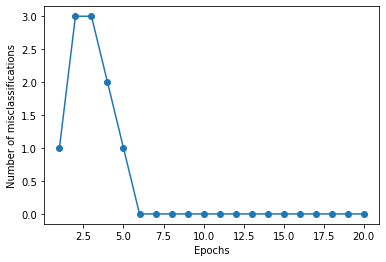

In [15]:
ppn1 = Perceptron(eta=0.1, epoch=20)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)
X = df.iloc[0:100,[0,2]].values
ppn1.train(X, y)
plt.plot(range(1, len(ppn1.errors) + 1), ppn1.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [23]:
def accuracy(actual, predicted):
    """
    Accuracy function
    :param actual:
    :param predicted:
    :return:
    """
    correct = 0
    for i in range(len(actual)):
        if int(actual[i]) == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

accClass1v2 = []
class1v2PredictedY = ppn1.predict(X)
accClass1v2.append(accuracy(y, class1v2PredictedY))
sum(accClass1v2) / len(accClass1v2)

100.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


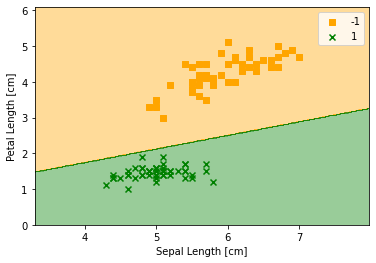

In [7]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('orange', 'green', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=1, c=cmap(idx),
                    marker=markers[idx], label=cl)

# Showing the final results of the perceptron model.
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend()

IRIS VERSICOLOR vs IRIS VIRGINICA

Epoch:  0
Weights:  [-0.2  -1.26 -1.2 ]
Epoch:  1
Weights:  [ 0.    0.16 -0.56]
Epoch:  2
Weights:  [ 0.    0.3  -0.82]
Epoch:  3
Weights:  [ 0.    0.44 -1.08]
Epoch:  4
Weights:  [ 0.    0.58 -1.34]
Epoch:  5
Weights:  [ 0.    0.72 -1.6 ]
Epoch:  6
Weights:  [ 0.    0.86 -1.86]
Epoch:  7
Weights:  [ 0.    1.   -2.12]
Epoch:  8
Weights:  [ 0.    1.14 -2.38]
Epoch:  9
Weights:  [ 0.    1.28 -2.64]
Epoch:  10
Weights:  [ 0.    1.42 -2.9 ]
Epoch:  11
Weights:  [ 0.    1.56 -3.16]
Epoch:  12
Weights:  [ 0.    1.7  -3.42]
Epoch:  13
Weights:  [ 0.    1.84 -3.68]
Epoch:  14
Weights:  [ 0.    1.98 -3.94]
Epoch:  15
Weights:  [ 0.    2.12 -4.2 ]
Epoch:  16
Weights:  [ 0.    2.26 -4.46]
Epoch:  17
Weights:  [ 0.    2.4  -4.72]
Epoch:  18
Weights:  [ 0.    2.54 -4.98]
Epoch:  19
Weights:  [ 0.    2.68 -5.24]


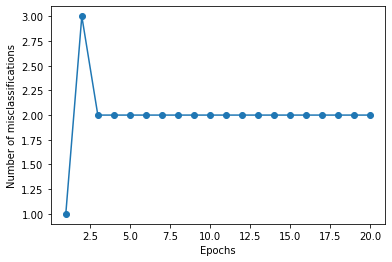

In [10]:
ppn2 = Perceptron(eta=0.1, epoch=20)
y = df.iloc[50:, 4].values
y = np.where(y == 'Iris-versicolor', 1, -1)
X = df.iloc[50:,[0,2]].values
ppn2.train(X, y)
plt.plot(range(1, len(ppn2.errors) + 1), ppn2.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [24]:
# Accuracy
accClass2v3 = []
class2v3PredictedY = ppn2.predict(X)
accClass2v3.append(accuracy(y, class2v3PredictedY))
sum(accClass2v3) / len(accClass2v3)

100.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


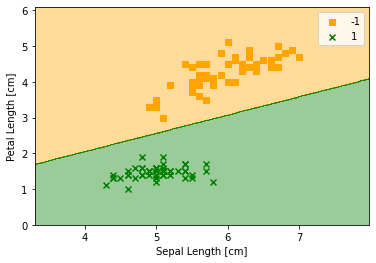

In [17]:
plot_decision_regions(X, y, classifier=ppn2)
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend()
plt.show()

IRIS SETOSA vs IRIS VIRGINICA

Epoch:  0
Weights:  [-0.2  -1.26 -1.2 ]
Epoch:  1
Weights:  [ 0.   -0.52 -1.84]
Epoch:  2
Weights:  [ 0.2   0.2  -2.38]
Epoch:  3
Weights:  [ 0.4   1.22 -2.1 ]
Epoch:  4
Weights:  [ 0.4   1.22 -2.1 ]
Epoch:  5
Weights:  [ 0.4   1.22 -2.1 ]
Epoch:  6
Weights:  [ 0.4   1.22 -2.1 ]
Epoch:  7
Weights:  [ 0.4   1.22 -2.1 ]
Epoch:  8
Weights:  [ 0.4   1.22 -2.1 ]
Epoch:  9
Weights:  [ 0.4   1.22 -2.1 ]
Epoch:  10
Weights:  [ 0.4   1.22 -2.1 ]
Epoch:  11
Weights:  [ 0.4   1.22 -2.1 ]
Epoch:  12
Weights:  [ 0.4   1.22 -2.1 ]
Epoch:  13
Weights:  [ 0.4   1.22 -2.1 ]
Epoch:  14
Weights:  [ 0.4   1.22 -2.1 ]
Epoch:  15
Weights:  [ 0.4   1.22 -2.1 ]
Epoch:  16
Weights:  [ 0.4   1.22 -2.1 ]
Epoch:  17
Weights:  [ 0.4   1.22 -2.1 ]
Epoch:  18
Weights:  [ 0.4   1.22 -2.1 ]
Epoch:  19
Weights:  [ 0.4   1.22 -2.1 ]


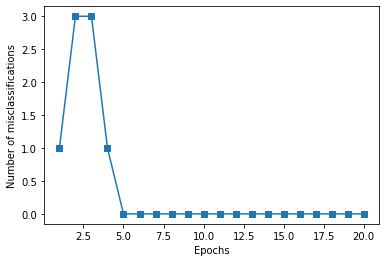

In [83]:
ppn3 = Perceptron(eta=0.1, epoch=20)
y1 = df.iloc[0:50, 4].values
y2 = df.iloc[100:, 4].values
y = np.concatenate([y1,y2],axis=0)
y = np.where(y == 'Iris-setosa', 1, -1)
x1 =  df.iloc[0:50,[0,2]].values
x2 =  df.iloc[100:,[0,2]].values
X = np.concatenate([x1,x2],axis=0)
ppn3.train(X, y)
plt.plot(range(1, len(ppn3.errors) + 1), ppn3.errors, marker='s')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [25]:
#Accuracy
accClass1v3 = []
class1v3PredictedY = ppn3.predict(X)
accClass1v3.append(accuracy(y, class1v3PredictedY))
sum(accClass1v3) / len(accClass1v3)

100.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


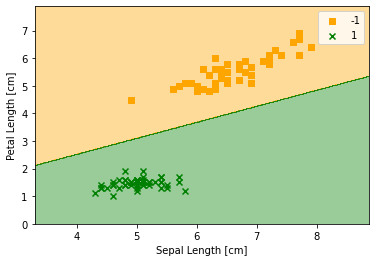

In [20]:
plot_decision_regions(X, y, classifier=ppn3)
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend()
plt.show()

SONAR DATASET

In [112]:
def readfile(filename):
    """
    File loader and reader function
    :param filename:
    :return:
    """
    arr = []
    with open(filename) as file:
        for line in file:
            arr.append(line.rstrip().split(","))
        arr = np.array(arr)
        l1 = arr[arr[:, -1] == "M"]
        l2 = arr[arr[:, -1] == "R"]
    return l1, l2

In [113]:
"Change the path of the file accordingly"
cl1, cl2 = readfile("/Users/sahibbhatia/Downloads/sonar.all-data")

In [114]:
X1 = cl1[:50,[0,1,2,3]].astype(np.float64)
X2 = cl2[:50,[0,1,2,3]].astype(np.float64)
trainX = np.concatenate((X1,X2),axis=0)
Y1 = cl1[:50,[-1]]
Y2 = cl2[:50,[-1]]
trainY = np.concatenate((Y1,Y2),axis=0)
trainy = np.where(Y=="M",1,-1).astype(np.float64)

Epoch:  0
Weights:  [-0.2     -0.004   -0.00742 -0.00856 -0.00414]
Epoch:  1
Weights:  [-0.2      0.00182 -0.00926 -0.00528  0.01712]
Epoch:  2
Weights:  [-0.2      0.00764 -0.0111  -0.002    0.03838]
Epoch:  3
Weights:  [-0.2      0.01346 -0.01294  0.00128  0.05964]
Epoch:  4
Weights:  [-0.2      0.01928 -0.01478  0.00456  0.0809 ]
Epoch:  5
Weights:  [-0.2      0.0251  -0.01662  0.00784  0.10216]
Epoch:  6
Weights:  [-0.2      0.03092 -0.01846  0.01112  0.12342]
Epoch:  7
Weights:  [-0.2      0.03674 -0.0203   0.0144   0.14468]
Epoch:  8
Weights:  [-0.2      0.04256 -0.02214  0.01768  0.16594]
Epoch:  9
Weights:  [-0.2      0.04838 -0.02398  0.02096  0.1872 ]
Epoch:  10
Weights:  [-0.2      0.0542  -0.02582  0.02424  0.20846]
Epoch:  11
Weights:  [-0.2      0.06002 -0.02766  0.02752  0.22972]
Epoch:  12
Weights:  [-0.2      0.06584 -0.0295   0.0308   0.25098]
Epoch:  13
Weights:  [-0.2      0.07166 -0.03134  0.03408  0.27224]
Epoch:  14
Weights:  [-0.2      0.07748 -0.03318  0.03736 

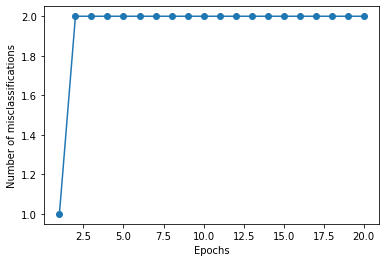

In [117]:
ppn4 = Perceptron(eta=0.1, epoch=20)
ppn4.train(trainX, trainy)
plt.plot(range(1, len(ppn4.errors) + 1), ppn4.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [116]:
#Accuracy
X1 = cl1[50:70,[0,1,2,3]].astype(np.float64)
X2 = cl2[50:70,[0,1,2,3]].astype(np.float64)
testX = np.concatenate((X1,X2),axis=0)
Y1 = cl1[50:70,[-1]]
Y2 = cl2[50:70,[-1]]
testY = np.concatenate((Y1,Y2),axis=0)
testy = np.where(testY=="M",1,-1).astype(np.float64)
accClassMvR = []
classMvRPredictedY = ppn4.predict(testX)
accClassMvR.append(accuracy(testy, classMvRPredictedY))
sum(accClassMvR) / len(accClassMvR)


50.0